### This is an attempt to create a model, using synthetic data, to show how the flow of waste through a pipe can be monitored to predict when it will clog.  We will only use 2 features:

### Our X-axis will be the percentage of the amount of waste that can go through the pipe.  Each pipe will start at 100%, let's imagine that this particular size pipe has a maximum of 50 gallons per minute that can flow through it.  As we more forward in time, let's say 200 days, the pipe may only be at 25 gallons per minute, or 50%.  As a precaution, we'd like to focus on pipes that go under 20% of maximum allowable flow so these can be cleaned before they clog and cause an SSO.

### Our Y-axis, and y-variable, will be the number of days.  We will predict the number of days that will occur before a particular pipe is expected to dip below 20% of its maximum flow.

### Let's first create a few dataframes.  Each will be different sizes to gauge how well the models can predict.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import proof_of_concept_helpers
from proof_of_concept_helpers import create_pipe_data
from proof_of_concept_helpers import poly_regression

# Exploring
import scipy.stats as stats

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [2]:
pipe_1 = create_pipe_data(104)

In [3]:
pipe_1.head()

,percent_flow,days
0,100,1
1,99,2
2,99,3
3,99,4
4,98,5


In [4]:
pipe_1.tail()

,percent_flow,days
99,20,100
100,20,101
101,20,102
102,19,103
103,19,104


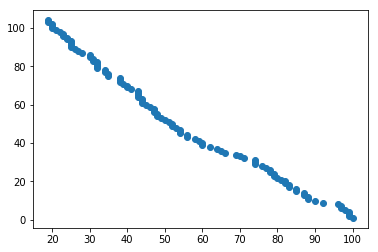

In [5]:
plt.scatter(pipe_1.percent_flow, pipe_1.days)

In [6]:
pipe_1.shape

(104, 2)

In [7]:
int(pipe_1.shape[0] * .7)

72

In [8]:
poly_regression(pipe_1, .7)

(72, 1)
---
(32, 1)
---
(72, 1)
---
32
The model performance for the training set
-------------------------------------------
RMSE of training set is 2.0546746837542185
R2 score of training set is 0.9902256884675428
The model performance for the test set
-------------------------------------------
RMSE of test set is 3.5840645088735537
R2 score of test set is 0.8493194322138765


In [9]:
pipe_2 = create_pipe_data(76)

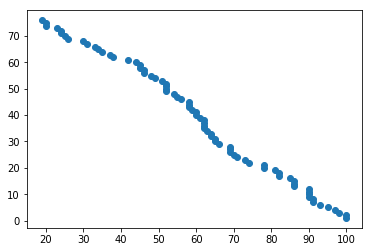

In [10]:
plt.scatter(pipe_2.percent_flow, pipe_2.days)

In [11]:
poly_regression(pipe_2, .7)

(53, 1)
---
(23, 1)
---
(53, 1)
---
23
The model performance for the training set
-------------------------------------------
RMSE of training set is 1.6879385987421842
R2 score of training set is 0.9878242020806678
The model performance for the test set
-------------------------------------------
RMSE of test set is 19.820537958639985
R2 score of test set is -7.928493749315647


### Linear Regression

In [12]:
# X_test = test[['percent_flow']]
# y_test = test[['days']]

In [13]:
# lm1 = LinearRegression()
# lm1.fit(X_train, y_train)

# lm1_y_intercept = lm1.intercept_
# print('Y-intercept: ' + str(lm1_y_intercept))

# lm1_coefficients = lm1.coef_
# print('Coefficients: ' + str(lm1_coefficients))

# y_pred_lm1 = lm1.predict(X_train)

In [14]:
# mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
# print("lm1\n  mse: {:.3}".format(mse_lm1)) 

In [15]:
# r2_lm1 = r2_score(y_train, y_pred_lm1)

# print('  {:.2%} of the variance in the pipe''s flow can be explained by the increase in number of days.'.format(r2_lm1))

In [16]:
# y_pred_test_lm1 = lm1.predict(X_test)
# mse_test_lm1 = mean_squared_error(y_test, y_pred_test_lm1)
# print("lm1\n  mse: {:.3}".format(mse_test_lm1)) 

In [17]:
# r2_test_lm1 = r2_score(y_test, y_pred_test_lm1)

# print('  {:.2%} of the variance in the pipe''s flow can be explained by the increase in number of days.'.format(r2_test_lm1))

### Linear is not so great on the test.  Let's try polynomial 2 degrees after we take a peek at the results.

In [18]:
# y_pred_lm1

In [19]:
# y_pred_test_lm1

### Polynomial

In [20]:
# poly_features = PolynomialFeatures(degree=2)

In [21]:
# ### transforms the existing features to higher degree features.
# X_train_poly = poly_features.fit_transform(X_train)

# ### fit the transformed features to Linear Regression
# poly_model = LinearRegression()
# poly_model.fit(X_train_poly, y_train)
    
# ### predicting on training data-set
# y_train_predicted = poly_model.predict(X_train_poly)

In [22]:
# rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
# r2_train = r2_score(y_train, y_train_predicted)

In [23]:
# print("The model performance for the training set")
# print("-------------------------------------------")
# print("RMSE of training set is {}".format(rmse_train))
# print("R2 score of training set is {}".format(r2_train))

In [24]:
# y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
# r2_test = r2_score(y_test, y_test_predicted)
# print("The model performance for the test set")
# print("-------------------------------------------")
# print("RMSE of test set is {}".format(rmse_test))
# print("R2 score of test set is {}".format(r2_test))

In [25]:
# y_test_predicted

In [26]:
# pipe_1_days = pd.DataFrame(pipe_1_days, columns=['days'])

In [27]:
# y_test_predicted = pd.DataFrame(y_test_predicted, columns=['days'])

In [28]:
# X_test.reset_index(drop=True, inplace=True)

In [29]:
# pipe_1_results = X_test.merge(y_test_predicted, left_index=True, right_index=True)

In [30]:
# pipe_1_results

In [31]:
# pipe_1_results[pipe_1_results.percent_flow <= 20][:1]

In [32]:
# y_train.iloc[-1][-1:]

In [33]:
# print('This pipe is expected to reach 20% of maximum flow at day ' +str(pipe_1_results['days'][pipe_1_results.percent_flow <= 20][:1]))

In [34]:
# print('Today is day ' + str(y_train.iloc[-1][-1:]))

In [35]:
# pipe_1.tail()